# Multi_parameter_optimization_analysis 使用範例

檢測到策略函數 get_signals 的參數: ['symbol', 'interval', 'end_time', 'limit', 'atr_period', 'fast_period', 'slow_period', 'signal_period', 'high_low_lookback', 'atr_multiplier_sl']
檢測到策略函數參數: ['symbol', 'interval', 'end_time', 'limit', 'atr_period', 'fast_period', 'slow_period', 'signal_period', 'high_low_lookback', 'atr_multiplier_sl']
開始靈活參數優化...
複合指標方法: geometric
門檻條件: {'Sharpe Ratio': 1.0, 'Sortino Ratio': 1.5, 'Calmar Ratio': 0.5}
創建新資料庫: TurtleMACDTimeZoneFilter_geo.db


[I 2025-08-31 01:21:49,607] A new study created in RDB with name: TurtleMACDTimeZoneFilter_geo


載入資料庫失敗：'Record does not exist.'
創建新資料庫...
已載入 study，包含 0 個試驗
警告：當前試驗數量 (0) 較少，建議至少運行 50 次試驗以確保分析可靠性


  0%|          | 0/200 [00:00<?, ?it/s]

[I 2025-08-31 01:22:02,602] Trial 0 finished with value: 0.6492201795942424 and parameters: {'fast_period': 19, 'slow_period': 24, 'signal_period': 6, 'high_low_lookback': 12}. Best is trial 0 with value: 0.6492201795942424.
[I 2025-08-31 01:22:02,616] Trial 1 finished with value: 2.112050085730573 and parameters: {'fast_period': 15, 'slow_period': 34, 'signal_period': 11, 'high_low_lookback': 29}. Best is trial 1 with value: 2.112050085730573.
[I 2025-08-31 01:22:15,993] Trial 2 finished with value: 0.7911983130963048 and parameters: {'fast_period': 10, 'slow_period': 21, 'signal_period': 12, 'high_low_lookback': 16}. Best is trial 1 with value: 2.112050085730573.
[I 2025-08-31 01:22:16,038] Trial 3 finished with value: 2.1290281899583614 and parameters: {'fast_period': 20, 'slow_period': 36, 'signal_period': 5, 'high_low_lookback': 22}. Best is trial 3 with value: 2.1290281899583614.
[I 2025-08-31 01:22:28,544] Trial 4 finished with value: 1.4282273529396592 and parameters: {'fast_pe

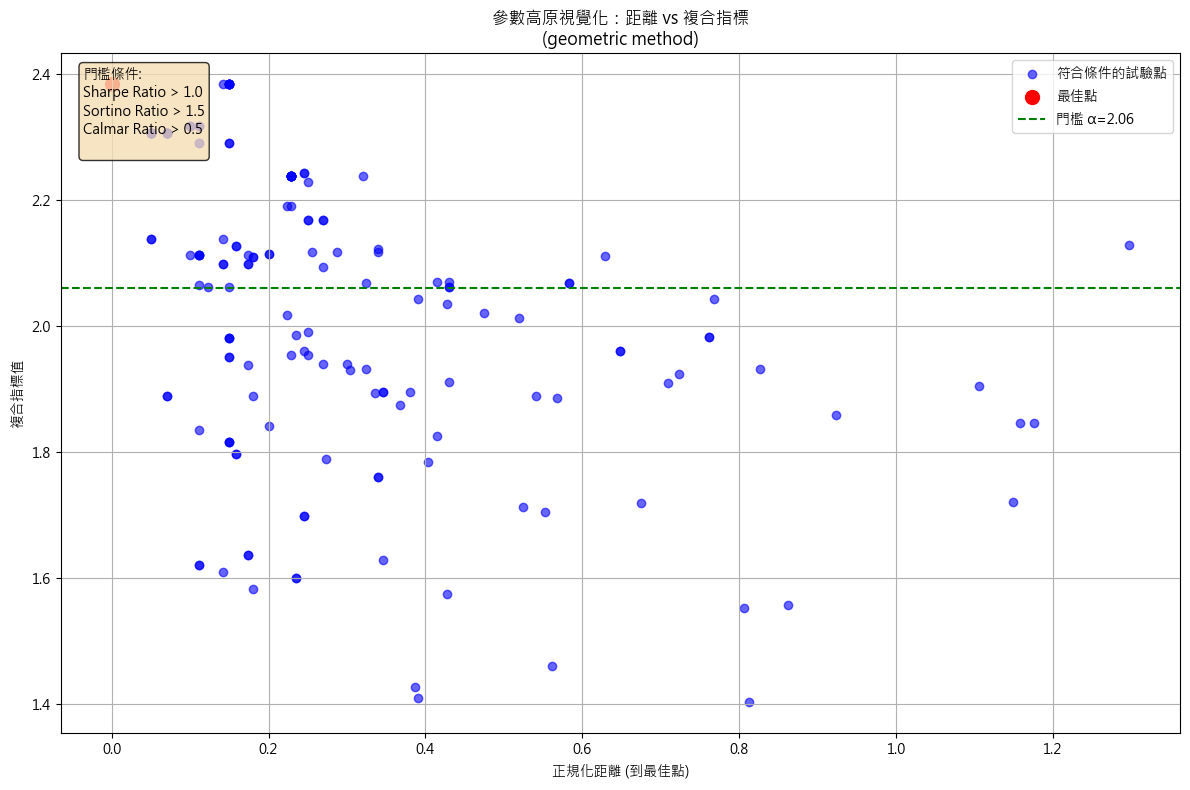


生成 optimize_params vs PPScore 熱力圖...
選擇與 composite_metric 相關性最高的參數：signal_period (相關係數: 0.359), high_low_lookback (相關係數: -0.292)


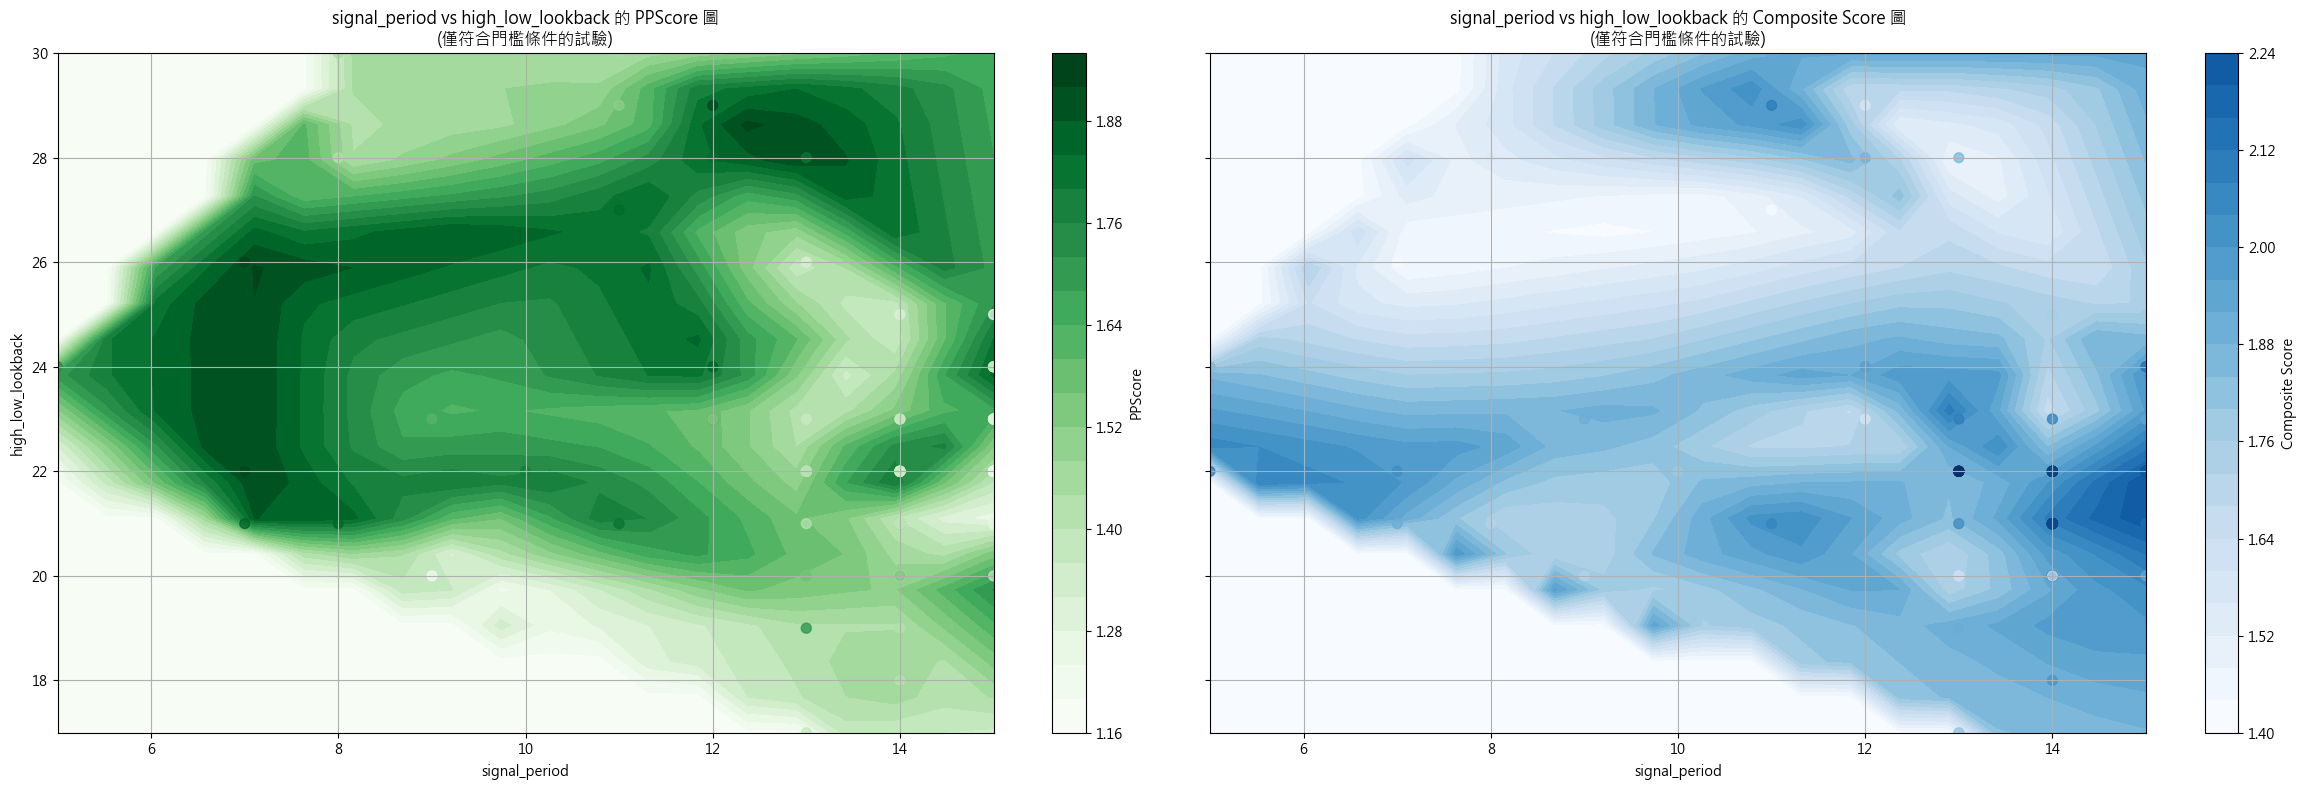


優化摘要:
總試驗數: 200
符合條件試驗數: 184
篩選率: 92.00%
符合門檻條件的試驗: 184 / 200

符合門檻條件試驗的多指標相關性分析:
  Sharpe Ratio vs Sortino Ratio: 0.976
  Sharpe Ratio vs Calmar Ratio: 0.872
  Sharpe Ratio vs composite_metric: 0.977
  Sortino Ratio vs Calmar Ratio: 0.838
  Sortino Ratio vs composite_metric: 0.966
  Calmar Ratio vs composite_metric: 0.948



帕雷托前沿分析（符合門檻條件）：
  符合條件的試驗數：184
  帕雷托最優解數量：18

前3個帕雷托解：
  解 1：
    Sharpe Ratio: 1.4484
    Sortino Ratio: 3.6419
    Calmar Ratio: 2.5693
    使用的參數：
      fast_period: 11
      slow_period: 31
      signal_period: 14
      high_low_lookback: 22

  解 2：
    Sharpe Ratio: 1.4484
    Sortino Ratio: 3.6419
    Calmar Ratio: 2.5693
    使用的參數：
      fast_period: 11
      slow_period: 31
      signal_period: 14
      high_low_lookback: 22

  解 3：
    Sharpe Ratio: 1.4484
    Sortino Ratio: 3.6419
    Calmar Ratio: 2.5693
    使用的參數：
      fast_period: 11
      slow_period: 31
      signal_period: 14
      high_low_lookback: 22


2. 繪製 HiPlot 交互式圖表:


<IPython.core.display.Javascript object>

HiPlot 視覺化已保存至 enhanced_optimization_results.html（符合門檻條件的試驗）

3. 相關性分析結果：
使用符合門檻條件的試驗數量: 184
過濾後的數據行數: 184

完整相關性矩陣（符合門檻條件的試驗）：
                   fast_period  slow_period  signal_period  high_low_lookback  Sharpe Ratio  Sortino Ratio  Calmar Ratio  composite_metric
fast_period              1.000        0.243         -0.393              0.275        -0.159         -0.108        -0.198            -0.164
slow_period              0.243        1.000         -0.218              0.038        -0.038         -0.033         0.026            -0.012
signal_period           -0.393       -0.218          1.000             -0.252         0.324          0.402         0.300             0.359
high_low_lookback        0.275        0.038         -0.252              1.000        -0.128         -0.101        -0.520            -0.292
Sharpe Ratio            -0.159       -0.038          0.324             -0.128         1.000          0.976         0.872             0.977
Sortino Ratio           -0.108       -

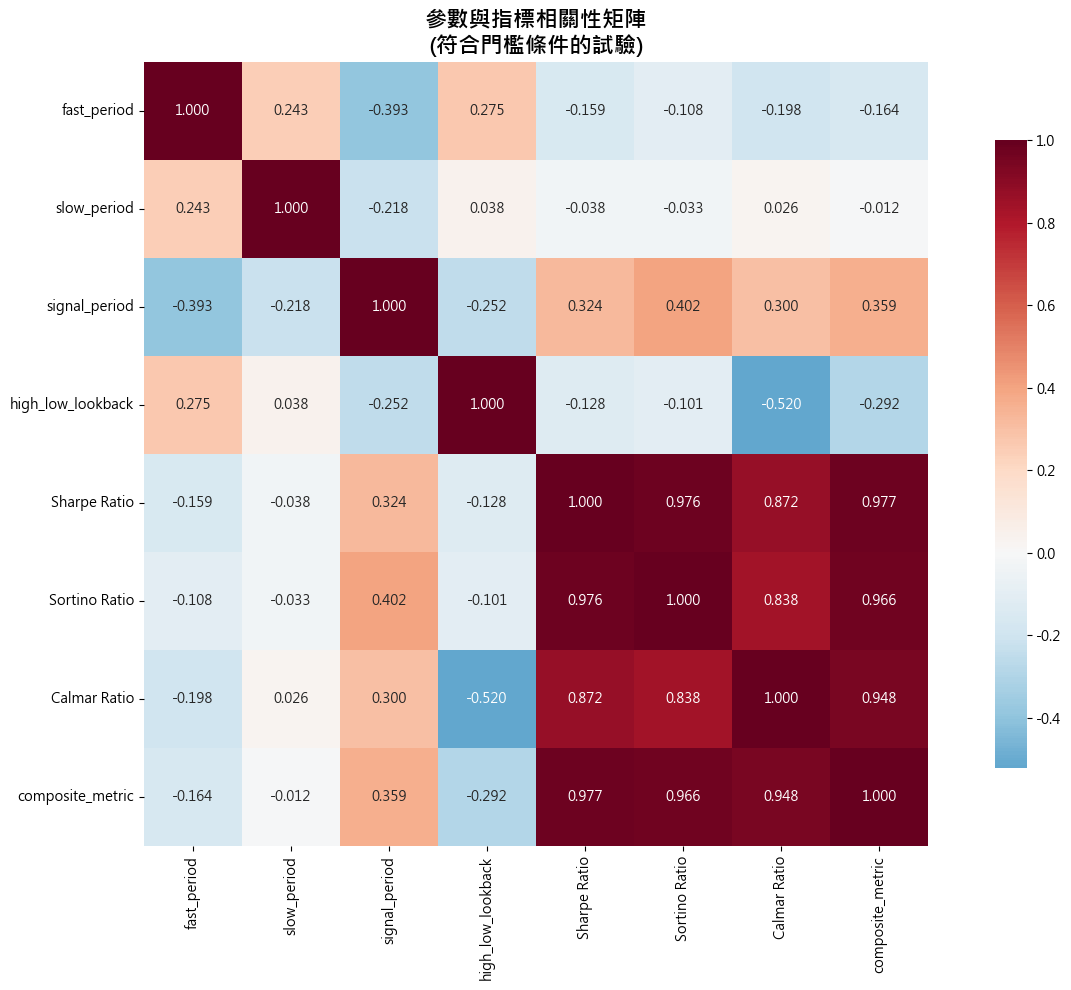

In [ ]:
from Multi_parameter_optimization_analysis import MPOA
from Technicalindicatorstrategy import TurtleMACDTimeZoneFilter
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
config = MPOA.create_custom_strategy_config(
    strategy_module=TurtleMACDTimeZoneFilter,
    strategy_function='get_signals',
    param_config={
        'fixed_params': {
            'symbol': 'ETHUSDT',
            'interval': '2h',
            'end_time': datetime.now(),
            'limit': 7309,
            'atr_period': 14,
            'atr_multiplier_sl': 2.9
        },
        'optimize_params': {
            'fast_period': {'type': 'int', 'min': 10, 'max': 20,'step': 1},
            'slow_period': {'type': 'int', 'min': 20, 'max': 40,'step': 1},
            'signal_period': {'type': 'int', 'min': 5, 'max': 15,'step': 1},
            'high_low_lookback': {'type': 'int', 'min': 10, 'max': 30,'step': 1},
        },
        'target_metrics': ['Sharpe Ratio', 'Sortino Ratio', 'Calmar Ratio'],
        'composite_config': {
            'method': 'geometric',  # 'weighted' 或 'geometric'
            'weights': {
                'Sharpe Ratio': 0.4,
                'Sortino Ratio': 0.4,
                'Calmar Ratio': 0.2
            },
            'thresholds': {
                'Sharpe Ratio': 1.0,
                'Sortino Ratio': 1.5,
                'Calmar Ratio': 0.5
            }
        },
        'backtest_config': {
            'initial_capital': 1000000,
            'fee_rate': 0.0005,
            'leverage': 1
        }
    }
)


optimizer = MPOA.FlexibleStrategyOptimizer(config)
study = optimizer.run_optimization(n_trials=200, n_jobs=2, study_name="TurtleMACDTimeZoneFilter_geo")

# 獲取優化摘要
summary = optimizer.get_optimization_summary()
print("\n優化摘要:")
print(f"總試驗數: {summary['total_trials']}")
print(f"符合條件試驗數: {summary['valid_trials']}")
print(f"篩選率: {summary['filter_rate']:.2%}")

# 多指標分析
trials_df = optimizer.analyze_multi_metric_results()

# 帕雷托前沿分析
optimizer.pareto_frontier_analysis()

# HiPlot 視覺化
print("\n2. 繪製 HiPlot 交互式圖表:")
optimizer.plot_hiplot(output_html="enhanced_optimization_results.html")

# 相關性分析
print("\n3. 相關性分析結果：")
corr_results = optimizer.analyze_param_metric_correlations()